# BBC News Classification Project

There exists a large amount of information being stored in the electronic format. With such data it has
become a necessity of such means that could interpret and analyse such data and extract such facts that could
help in decision-making.<br>
News is easily accessible via content providers such as online news services. A huge amount of information exists in form of text in various diverse areas whose analysis can be beneficial in several areas. Classification is quite a challenging field in text mining as it requires prepossessing steps to convert unstructured data to structured information. With the increase in the number of news it has got difficult for users to access news of his interest which makes it a necessity to categories news so that it could be easily accessed. Categorization refers to grouping that allows easier navigation among articles. Internet news needs to be divided into categories

### The Dataset
Text documents are one of the richest sources of data for businesses.

We’ll use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech.

The dataset is broken into 1490 records for training and 735 for testing. The goal will be to build a system that can accurately classify previously unseen news articles into the right category.


1. **Summary of the project**: We are classifying BBC news articles into five categories using natural Language Processing and Machine Learning. The five news topics are: Politics, Entertainment, Sports, Technology, and Business. The goal of this project is to create a text classifier that will streamline the process of categorizing news publications. 
<br><br>
2. **Summary of the data**: The dataset consists of 2225 news articles extracted from the BBC website between 2004 and 2005. It was published open source by Insight Resources and was collected by UC Davis for research. The class distribution is as follows:
```
business: 510
entertainment: 386
politics: 417 
sports: 511
technology: 401 
```

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df_train = pd.read_csv('/content/drive/My Drive/AI_Project/NLP/BBC-News-Classification/Data/BBC News Train.csv')

In [4]:
df_train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [5]:
df_train['category_id'] = df_train['Category'].factorize()[0]

View first 10 entries of category_id

In [7]:
#View first 10 entries of category_id, as a sanity check
df_train['category_id'][0:10]

0    0
1    0
2    0
3    1
4    0
5    2
6    3
7    4
8    0
9    4
Name: category_id, dtype: int64

### Create a new pandas dataframe

In [9]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = df_train[['Category', 'category_id']].drop_duplicates().sort_values('category_id')

In [10]:
category_id_df

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


#### Create a dictionary

In [11]:
# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)

In [12]:
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [14]:
# Pick 5 random samples from the dataframe
df_train.sample(5, random_state=0)

,ArticleId,Text,Category,category_id
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4
354,1349,tory candidate quits over remark a conservativ...,politics,2
1227,1572,bath faced with tindall ultimatum mike tindall...,sport,3
907,1155,chancellor rallies labour voters gordon brown ...,politics,2
575,307,young debut cut short by ginepri fifteen-year-...,sport,3


#### Group the dataframe by categories and count items

In [16]:
# Group the dataframe by categories and count items ( number of news articles) in each category
df_train.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

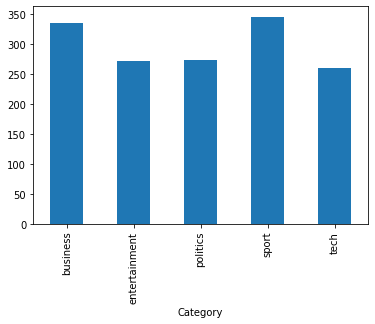

In [18]:
#Plot the distribution of news articles by category
df_train.groupby('Category').category_id.count().plot.bar(ylim=0)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df_train.Text).toarray() # Remaps the words in the 1490 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = df_train.category_id                           # represents the category of each of the 1490 articles

In [22]:
#Get a feel of the features identified by tfidf
features.shape # How many features are there ? 

(1490, 9927)

In [23]:
# Remember the dictionary created to map category names to a number ? 
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [24]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[('business', 0),
 ('entertainment', 4),
 ('politics', 2),
 ('sport', 3),
 ('tech', 1)]

In [25]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone


In [26]:
features_chi2

(array([0.13345481, 0.01563765, 0.00108776, ..., 0.00812363, 0.15434356,
        0.120306  ]),
 array([0.71487652, 0.9004835 , 0.97368962, ..., 0.92818297, 0.69441858,
        0.72870284]))

In [27]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

In [28]:
type(projected_features)

numpy.ndarray

In [29]:
my_id = 0 # Select a category_id
projected_features[(labels[indices] == my_id).values]

array([[-17.409828  , -20.436989  ],
       [ -9.56882   , -11.314312  ],
       [-17.156994  ,  -6.452465  ],
       [-10.862223  , -21.660397  ],
       [-19.501608  ,   4.6090965 ],
       [-11.990335  , -16.382895  ],
       [-27.134926  ,  -2.8496113 ],
       [ -9.668595  , -17.357132  ],
       [  8.465661  ,  -9.051764  ],
       [-19.876314  ,  -9.820042  ],
       [  2.6430216 ,   3.9847393 ],
       [-15.166494  , -10.5767145 ],
       [ 15.052534  , -22.136509  ],
       [-29.180244  , -15.261823  ],
       [-11.231472  , -24.399818  ],
       [-13.417371  , -11.908246  ],
       [ -8.409627  , -11.635613  ],
       [-11.572334  , -18.307085  ],
       [-17.998095  , -14.864076  ],
       [-26.832064  ,  -5.992347  ],
       [ -0.91015923, -20.449903  ],
       [-23.755339  , -14.732829  ],
       [-17.284416  ,  -6.835661  ],
       [-22.186396  , -10.912631  ],
       [-11.207357  , -14.555125  ],
       [-25.065447  , -10.098723  ],
       [-22.816729  , -12.928076  ],
 

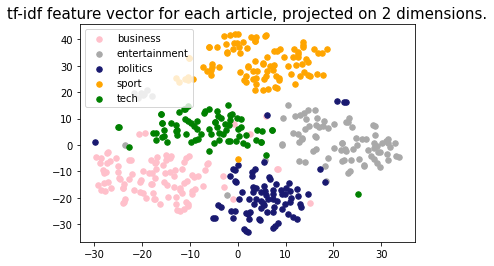

In [30]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']


# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

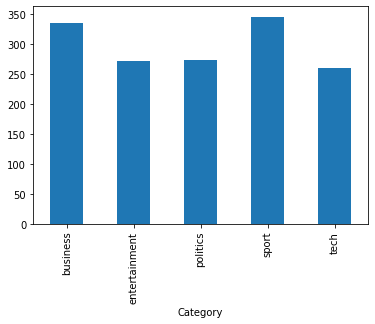

In [ ]:
df_train.groupby("Category").category_id.count().plot.bar(ylim=0)

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df_train.Text).toarray()
labels = df_train.category_id

In [ ]:
category_to_id = {'business':0, 'tech':1, 'politics':2, 'sport':3, 'entertainment':4}
id_to_category = {0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [ ]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . growth
       . bank
       . shares
  . Most correlated bigrams:
       . stock market
       . economic growth
       . analysts said
# 'entertainment':
  . Most correlated unigrams:
       . singer
       . actor
       . film
  . Most correlated bigrams:
       . won best
       . los angeles
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . prime minister
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . match
       . coach
       . cup
  . Most correlated bigrams:
       . grand slam
       . champions league
       . australian open
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . anti virus
       . mobile phones
       . mobile phone
